# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [5]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats as st

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Plot box plot for the above data and write your inference on the group means from the boxplots.

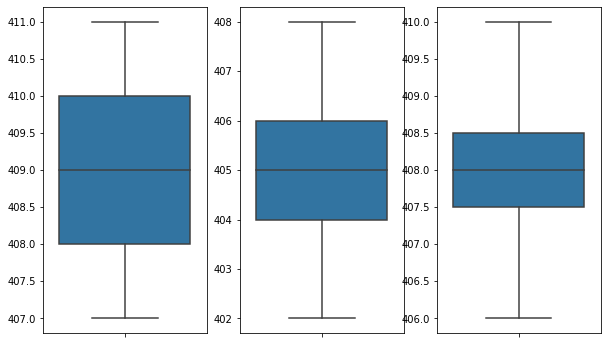

In [3]:
fig,axes=plt.subplots(1,3,figsize=(10,6))
sns.boxplot(y=life_type_A,ax=axes[0])
sns.boxplot(y=life_type_B,ax=axes[1])
sns.boxplot(y=life_type_C,ax=axes[2])
plt.show()

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [6]:
st.f_oneway(life_type_A,life_type_B,life_type_C)

F_onewayResult(statistic=4.5, pvalue=0.04419417382415922)

p value is less than 0.05 % so we have to reject null

### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [9]:
df=pd.DataFrame({'LifeTime_inHours':[407, 411, 409,404, 406, 408, 405, 402,410, 408, 406, 408],
                 'Device':['A','A','A','B','B','B','B','B','C','C','C','C']})
df

,LifeTime_inHours,Device
0,407,A
1,411,A
2,409,A
3,404,B
4,406,B
5,408,B
6,405,B
7,402,B
8,410,C
9,408,C


In [10]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model=ols('LifeTime_inHours~Device',data=df).fit()
at=anova_lm(model)
at

,df,sum_sq,mean_sq,F,PR(>F)
Device,2.0,36.0,18.0,4.5,0.044194
Residual,9.0,36.0,4.0,NaN,NaN


In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [12]:
pairwise_tukeyhsd(df.LifeTime_inHours,df.Device).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-4.0,0.0541,-8.0746,0.0746,False
A,C,-1.0,0.7824,-5.2613,3.2613,False
B,C,3.0,0.1177,-0.7427,6.7427,False


### Practice Exercise 2

### A sample of number of sell of a particular product over different days in different stores have been collected.Perform a test to check whether different stores and different days have any effect on the number of products that have been sold.

In [15]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [16]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


In [13]:
df2 = pd.DataFrame({'Value':[ 69,71,64,67, 56,68, 76, 79, 87, 76,71, 77, 74, 84, 72,70, 73, 71, 78, 73,60, 64, 67, 79, 58],
                    'day':[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5],
                    'store_type':['Store-A','Store-A','Store-A','Store-A','Store-A','Store-B','Store-B','Store-B','Store-B','Store-B',
                                 'Store-C','Store-C','Store-C','Store-C','Store-C','Store-D','Store-D','Store-D','Store-D','Store-D',
                                 'Store-E','Store-E','Store-E','Store-E','Store-E']})
df2.head()

,Value,day,store_type
0,69,1,Store-A
1,71,1,Store-A
2,64,1,Store-A
3,67,1,Store-A
4,56,1,Store-A


In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [18]:
model=ols('Value~day+store_type',data=df2).fit()
anova_table=anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
store_type,4.0,617.360000,154.340000,4.146695,0.013184
day,1.0,63.048657,63.048657,1.693946,0.207875
Residual,20.0,744.400000,37.220000,NaN,NaN


## Chi Square

### Practice Exercise 3

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [19]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()


In [20]:
n=500
vegen=0.28
veg=0.52
nonveg=0.25
jain=0.05
obs_v=np.array([190,185,90,35])
expected_v=np.array([0.28*n,0.42*n,0.25*n,0.05*n],)
expected_v

array([140., 210., 125.,  25.])

In [21]:
o_e_square_by_e=((obs_v-expected_v)**2)/expected_v
chistat=o_e_square_by_e.sum()
chistat

34.63333333333334

In [22]:
st.chisquare(obs_v,expected_v)

Power_divergenceResult(statistic=34.63333333333334, pvalue=1.4561004918754443e-07)

### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [24]:
import numpy       as np
import scipy.stats as stats

churn_array = np.array([[15,142],[24, 400],[30, 389]])


In [25]:
stats.chi2_contingency(churn_array)

(2.779977047087869, 0.24907816314986156, 2, array([[ 10.833, 146.167],
        [ 29.256, 394.744],
        [ 28.911, 390.089]]))

## E N D  